In [9]:
import speech_recognition as sr
import pyaudio
import wave
from pydub.playback import play
from pydub import AudioSegment
import numpy as np
import struct
import time
sr.__version__

'3.8.1'

# 녹음하기

In [10]:
po = pyaudio.PyAudio()

In [11]:
for index in range(po.get_device_count()): 
    desc = po.get_device_info_by_index(index)
    print("INDEX:  %s  RATE:  %s   DEVICE: %s" %(index, int(desc["defaultSampleRate"]), desc["name"]))

INDEX:  0  RATE:  44100   DEVICE: Microsoft 사운드 매퍼 - Input
INDEX:  1  RATE:  44100   DEVICE: 마이크(USB Microphone)
INDEX:  2  RATE:  44100   DEVICE: 마이크 배열(2- Realtek(R) Audio)
INDEX:  3  RATE:  44100   DEVICE: Microsoft 사운드 매퍼 - Output
INDEX:  4  RATE:  44100   DEVICE: 스피커(2- Realtek(R) Audio)
INDEX:  5  RATE:  44100   DEVICE: 주 사운드 캡처 드라이버
INDEX:  6  RATE:  44100   DEVICE: 마이크(USB Microphone)
INDEX:  7  RATE:  44100   DEVICE: 마이크 배열(2- Realtek(R) Audio)
INDEX:  8  RATE:  44100   DEVICE: 주 사운드 드라이버
INDEX:  9  RATE:  44100   DEVICE: 스피커(2- Realtek(R) Audio)
INDEX:  10  RATE:  48000   DEVICE: 스피커(2- Realtek(R) Audio)
INDEX:  11  RATE:  48000   DEVICE: 마이크 배열(2- Realtek(R) Audio)
INDEX:  12  RATE:  44100   DEVICE: 마이크(USB Microphone)
INDEX:  13  RATE:  44100   DEVICE: 마이크 배열 (Realtek HD Audio Mic input)
INDEX:  14  RATE:  44100   DEVICE: Speakers (Realtek HD Audio output)
INDEX:  15  RATE:  48000   DEVICE: 스테레오 믹스 (Realtek HD Audio Stereo input)
INDEX:  16  RATE:  44100   DEVICE: Headphone

In [12]:
FORMAT = pyaudio.paInt16
LEN = 10**100
PASS = 5
CHANNELS = 1
RATE = 44100
CHUNK = 1024
RECORD_SECONDS = 3
MIN_STRING_LIST_LENGTH = 9
WAVE_OUTPUT_FILENAME = "./data/wav/file.wav"

In [6]:
while(True):
    audio = pyaudio.PyAudio()

    # start Recording
    stream = audio.open(format=pyaudio.paInt16, 
                    channels=CHANNELS, 
                    rate=RATE, 
                    input=True, 
                    input_device_index=1,
                    frames_per_buffer=CHUNK)

    frames, string_list = [], []
    
    for i in range(LEN):
        data = stream.read(CHUNK)
        frames.append(data)
        string = np.fromstring(data, np.int16)[0]
        string_list.append(string)
        
         # stop Recording
        if string == 0 and i > PASS:
            break

    stream.stop_stream()
    stream.close()
    audio.terminate()

    waveFile = wave.open(WAVE_OUTPUT_FILENAME, 'wb')
    waveFile.setnchannels(CHANNELS)
    waveFile.setsampwidth(audio.get_sample_size(FORMAT))
    waveFile.setframerate(RATE)
    waveFile.writeframes(b''.join(frames))
    waveFile.close()

    if len(string_list) > MIN_STRING_LIST_LENGTH:
        r = sr.Recognizer()
        korean_audio = sr.AudioFile("./data/wav/file.wav")

        with korean_audio as source:
            mandarin = r.record(source)
        
        try :
            sentence = r.recognize_google(audio_data=mandarin, language="ko-KR")
            print(sentence)
            if sentence in '종료':
                break
        except:
            print('*** 다시 말해주세요 ***')
        

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead


만약 다나나가 3보다 크다면
*** 다시 말해주세요 ***
*** 다시 말해주세요 ***
종료


# 녹음 파일 듣기

In [187]:
audio_file = AudioSegment.from_file(file="./data/wav/file.wav")

play(audio_file)

# 텍스트 읽어오기

In [19]:
r = sr.Recognizer()

In [20]:
korean_audio = sr.AudioFile("./data/wav/file.wav")

with korean_audio as source:
    mandarin = r.record(source)

r.recognize_google(audio_data=mandarin, language="ko-KR")

'안녕하세요'

C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  if __name__ == '__main__':
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  if __name__ == '__main__':


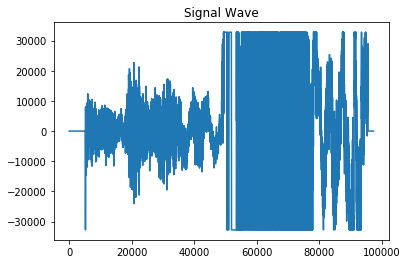

In [7]:
import matplotlib.pyplot as plt
import wave
import sys

spf = wave.open("./data/wav/file.wav", "r")

# Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, "Int16")

# If Stereo
if spf.getnchannels() == 2:
    sys.exit(0)

plt.figure(1)
plt.title("Signal Wave")
plt.plot(signal)
plt.show()